# Lab Session 4: Modularization, Environments, Binder

> Friday 02-17-2023, 9AM-11AM & 12AM-2PM 
>
> Instructor: [Facundo Sapienza](https://statistics.berkeley.edu/people/facu-sapienza)

Inside the notebook `Erasthostenes.ipynb` (located in this same folder in the `site` repository) there is a non-very well written piece of code for calculating all prime numbers until a certain number. We are going to work with the contents of this notebook and re-organize it so it looks like a decent project: better code, better documentation, and more reproducible. 

Useful links:
- [Lecture on modularity](https://ucb-stat-159-s23.github.io/site/lectures/modularity/modularity.html)
- [Lecture on environments](https://ucb-stat-159-s23.github.io/site/lectures/environments/environments.html)

## 1. Modularization

First things first: be sure you can run all the code inside `Eratosthenes.ipynb`.
After being sure the code runs, we are going to start with some re-organization of the code inside `Eratosthenes.ipynb`.

<img src="https://www.onlinemathlearning.com/image-files/sieve-prime.jpg" alt="eratosthenes" width="400"/>


### 1.1. Reorganization

1. The first thing you will do is to create two separate functions for the sieve of Eratosthenes algorithms. These are the first things you will see inside the notebook. Think what are the arguments for such functions. 
2. Now, these two functions do the same but they have different implementations. Most likely, they also have the same arguments and outputs. Create a new function `get_primes` that you call to run both methods. 
3. Move these three functions to a separate script called `sieve.py`. Remember to import the necessary libraries inside `sieve.py`.
4. Import all this function into the notebook using the `import` statement in the first cell of the notebook. 
```{warning}
For now, every time you make a change in `sieve.py` and a consequent `import` inside the notebook, you will have to restart the kernel first. This is because once imported, the iPython kernel reads that the script has been already loaded and it doesn't look for differences in the new file. In general, it's a good practice to restart your kernel once the counter starts increasing and after doing significant reorganization changes in the notebook, like we are doing here.
```
5. In the section _Long Run: proportion of prime numbers_ there is a long run of exactly the same code than before but inside a for loop, so we can evaluate the proportion of prime numbers as we increase the search window. Make a new function called `proportion_primes` that does this.
6. You function look good, but now let's add some documentation to them. Add a `docstring` to them. How can you access the docstrings from the notebook? 
7. Be sure you can run these functions from the notebook _after you move the code to the scripts (no remains in the notebook)_ and _after you have restarted your kernel_.

In [2]:
import sieve
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
print(sieve.get_primes(55, 1))
print(sieve.get_primes(55, 2))
print(len(sieve.proportion_primes(np.arange(100, 5000, 100))))
print(sieve.get_primes_1.__doc__)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]
49
takes a integer nmax, returns all primes under the integer


### 1.2. Modules

1. Now, after you know the previous import statement are working, move to `sieve.py` to a new folder called `sievetools`.
2. Inside the folder, create an `__init__.py` file with the required contents so you can do the import from the notebook. Now, you should be able to do the import in the notebook by doing 
```python
from sievetools import sieve
```

```{tip}
Now that you have a proper module, you can import the scripts using the `import imp; imp.reload("sieve.py")` in case you want the changes to be reflected after the import. 
```
3. Each one of the files inside `sievetools` is called a module. Now, continue your cleaning of `Eratosthenes.ipynb` by moving all the plotting code required to a new module called `plots`. Update `__init__.py` to make the imports of this new module. By the end of the day, you should be able to generate the plots from the notebook using something like
```python
plot_sieve(.... , log_scale=True)
```
4. [Extra] You can continue and do something similar for the code in the section _Performance_.

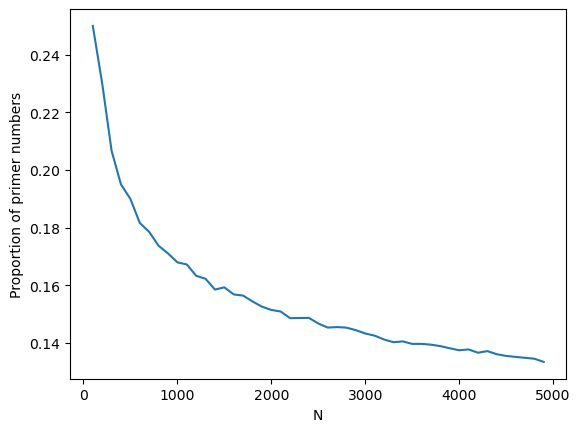

In [3]:
from sievetools import sieve
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

all_nmax = np.arange(100, 5000, 100)
all_proportions = sieve.proportion_primes(all_nmax)
sieve.plot_sieve(all_nmax, all_proportions, log_scale = False)

## 2. Migrate to GitHub

Let's now create a project containing the previous piece of code and let's version control it! 

1. Create a new public repository called `eratosthenes` where you will include all the contents for the Eratosthenes project you created before. You can create your repository first in local and then push it to GitHub or directly created in GitHub and then push your changes there. Also, you can create the repository in your personal GitHub account or also in the [UCB-stat-159-s23](https://github.com/UCB-stat-159-s23) GitHub site, in which case please we ask you to add your username/teamname in front of the repository name (eg, `facusapienza21-eratosthenes`).
1. Add a `README.md` file in the repository with a minimal explanation about the project. 

## 3. Environmnets

In this section we are going to create a conda environment for this project. Two very useful resources for this section are 
- [Lecture notes on environments](https://ucb-stat-159-s23.github.io/site/lectures/environments/environments.html): Here is the information about what a conda environmnt is and how to manage them. Please take some time to go though it becuase you will need it! 
- [Managing environments](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html): The conda documentation about operations on environments is very complete.

<img src="https://files.realpython.com/media/Python-Virtual-Environments_Watermarked.4c787192d42f.jpg" alt="conda" width="400"/> 

_image taken from [Python Virtual Environments: A Primer](https://realpython.com/python-virtual-environments-a-primer/)_

### 3.1. Create environment for a project

There are different ways how you can create a new conda environment. For reproducibility, the best practice is to share an `environment.yml` file that includes all the required packages and then create the environment from it. In order to start with this, we are going to start by creating a fresh environment that then we are going to export and share.

1. First that all, create a new folder in your home directory called `envs`. You can do this from the terminal
```bash
mkdir envs
```
2. Now, go to the `.condarc` file (hidden) in your home directory and be sure that it includes a list of `envs_dirs` with the locations where you are going to install the conda environments. The `.condarc` file should include something like this
```
envs_dirs:
  - ~/envs
  - ~/shared/envs 
```
3. In the terminal, let's create a new environment called `test_env` with an specific Python version. It may take a few seconds until it creates the new environment. 
```bash
conda create -n myenv python=3.9
```

4. In the terminal, do `conda env list` to see the list of all the environments you have installed. Activate the new environment with `conda activate`.

5. At this point, you can run code from this environment just from the terminal. Our next step is to make this environment available from the notebook. Take a look to the [Using an environment in your notebooks](https://ucb-stat-159-s23.github.io/site/lectures/environments/environments.html). In order for this to work, first you need to install the `ipykernel` package. You can do this with the following command
```bash
mamba install ipykernel
```

6. After doing this, you need to let Jupyter know that you want to use this environment’s kernel, by installing the environment’s ipykernel into Jupyter:
```bash
python -m ipykernel install --user --name <ENVIRONMENT NAME> --display-name "IPython - <NAME>"
```

After doing this, the environment should be visible from the notebook. Go to the upper right corner of your notebook and change the kernel. It may be necessary to restart your server in order to make this changes visible. 

```{note}
What just happened? You have created a new virtual environment in your machine. Where is it? Go inside the `envs` folder and see what is there. This is where you conda environments live. If you delete this folders, the environment disappear.  
```

### 3.2. Growing and exporting

1. Now that the environment is working and running from the notebook `Eratosthenes.ipynb`, do the required installations so the code runs. So far, nothing really has being installed in your environment. You will need to install basic packages like `numpy` and `matplotlib`. You can use `pip`, `conda` or `mamba` to install packages, but we recommend you to use `mamba` when possible.
2. Once you environment has all the required dependencies, export them to a `environment.yml` file. The `conda env export` shows you the contents that should go to the configuration file. We recommend you to use the following syntax at the moment of exporting an environment. 
```bash
conda env export --from-history > environment.yml
```
3. Now check what is inside `environment.yml`. Push this file to your repository.

These is the list of commands that you most likely will be using all time when working with conda environments:
- `conda activate`
- `conda env list`
- `conda list`
- `conda env export`

### 3.3. Binder

Now, we are going to launch the code into the cloud so everyone can run it! We are going to use [Binder](https://mybinder.readthedocs.io/en/latest/) for this. Doing this is surprisingly simple.

<img src="https://miro.medium.com/max/471/1*cWQj_YdmY_p14eh628N_Kg.png" alt="binder" width="300"/> 

1. Go to [mybinder.org](https://mybinder.org) and enter the information of the repository. Then just enter `Launch`! In order for this to work, be sure that
    1. The environment file needs to be specified under the name `environment.yml`. Be sure your GitHub repository contains that file. 
    1. Be sure your repository is public. 
2. If everything is in order, this will launch the JupyterLab interface you are already using for this course. Check that the code runs here too and that all the required packages are installed in this new server. Now you can see how [Binder helps ensure reproducibility](https://mybinder.readthedocs.io/en/latest/tutorials/reproducibility.html).
3. Binder allows you to create a badge and link that will launch the virtual machine every time you click on it. See how to do this and add this badge to the `README.md` file.